# Phase IV: Exploratory Data Analysis & Feature selection Using Decision Trees

## Joseph Princiotta & Justin Lusk

### Phase 0-3 Code Section
This section must be run prior to PhaseIV section to setup data. 

In [3]:
### Phase 0/1 Code.
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


dfTest = pd.read_csv(r"Downloads/Phishing_Legitimate_test_student.csv", na_values=['',' ','n/a'],encoding='utf8')
dfTrain = pd.read_csv(r"Downloads/Phishing_Legitimate_train_missing_data.csv", na_values=['',' ','n/a'],encoding='utf8')
################################# Phase 0 and 1 ####################################################
trainRowsWithNa = dfTrain[ dfTrain.isnull().any(axis=1) ]
rowsToDrop = dfTrain[ dfTrain.isnull().sum(axis=1) > 1 ].index
dfTrain.drop(rowsToDrop, inplace=True)
imputer = KNNImputer(n_neighbors=10)
dfTrain2 = pd.DataFrame(imputer.fit_transform(dfTrain),columns = dfTrain.columns)
rows_to_drop=dfTrain2[dfTrain2['UrlLength']>500].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumNumericChars']>100].index
dfTrain2.drop(rows_to_drop,inplace=True)
rows_to_drop=dfTrain2[dfTrain2['NumDash']>20].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname',
          'NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
clf= LocalOutlierFactor(n_neighbors=20)
X=dfTrain2Numerical.to_numpy()
outlier_label=clf.fit_predict(X)
rows_to_drop= dfTrain2.iloc[clf.negative_outlier_factor_ < -1.30].index
dfTrain2.drop(rows_to_drop,inplace=True)
dfTrain2Numerical = dfTrain2[['NumNumericChars','NumDots','SubdomainLevel','PathLevel','UrlLength','NumDash','NumDashInHostname','NumUnderscore','NumPercent','NumQueryComponents','NumAmpersand','NumHash','HostnameLength','PathLength','QueryLength','NumSensitiveWords']]
X = dfTrain2Numerical.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
dfTrain2Numerical.is_copy = False
dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X

## Phase 3/4 Code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])

# Create dataframe of standardized numerical features
dfTrain2Numstd= dfTrain2Numerical[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]

# Created dataframe of all binary data, now binary and standardized numerical features can be seperated IF NEEDED.
dfTrain2Bin= dfTrain2[['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]
# dfTrain2Bin contains binary features and dfTrain2Numstd contains standardized numerical data. 

# Create main dataframe that contains standardized numerical data and binary data
dfTrain3=dfTrain2Bin.join(dfTrain2Numstd)
# Create list of all features
featurecols=dfTrain3.columns.to_list()

# Create seperate lists for numerical & binary features lists
NUMfeaturecols=dfTrain2Numstd.columns.to_list()
BINfeaturecols=dfTrain2Bin.columns.to_list()

####### Dataframe list: ######
# 'dfTrain3' = Main dataframe of training data, std numerical and binary data 
# 'featurecols' = list of all feature cols in 'dfTrain3'
# 'NUMfeaturecols' = list of all numerical features 
# 'BINfeaturecols' = list of all binary features
# 'dfTrain2Bin' = all binary features 
# 'dfTrain2Numstd' = all numerical features standardized

# Create dataframe of target 'CLASS_LABEL'
dfClass_labels = pd.DataFrame(dfTrain2['CLASS_LABEL'])
# Add 'dfClass_labels' to main dfTrain3 
dfTrain3 = dfTrain3.join(dfClass_labels)
chosenNumeric = dfTrain3[['CLASS_LABEL','NumDash_Standardized','PathLength_Standardized','UrlLength_Standardized','PathLevel_Standardized']]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
columns_to_select=['AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']

rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 3, step = 1)
rfe_selector.fit(dfTrain3[columns_to_select], dfTrain3['CLASS_LABEL'])
dfTrain3[columns_to_select].columns[ rfe_selector.get_support() ]
columns_to_plot=['NoHttps','IpAddress', 'InsecureForms','CLASS_LABEL']


C:\Users\jlusk\AppData\Local\Temp\ipykernel_16728\1152303621.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain2Numerical[['NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','UrlLength_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized']]=X
C:\Users\jlusk\AppData\Local\Temp\ipykernel_16728\1152303621.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

### Feature Selection list from Phase 0-3
1. 'DomainsInPaths' | Binary
2. 'RandomString' | Binary
3. 'InsecureForms' | Binary
4. 'NumDash_Standardized' | Numerical
5. 'PathLength_Standardized' | Numerical
6. 'UrlLength_Standardized' | Numerical
7. 'PathLevel_Standardized' | Numerical

## Part A
### Build & Plot Decision Tree 
A decsion tree will be used on the entire featureset to determine which features are the best for determining the target variable 'ClASS_LABEL'.

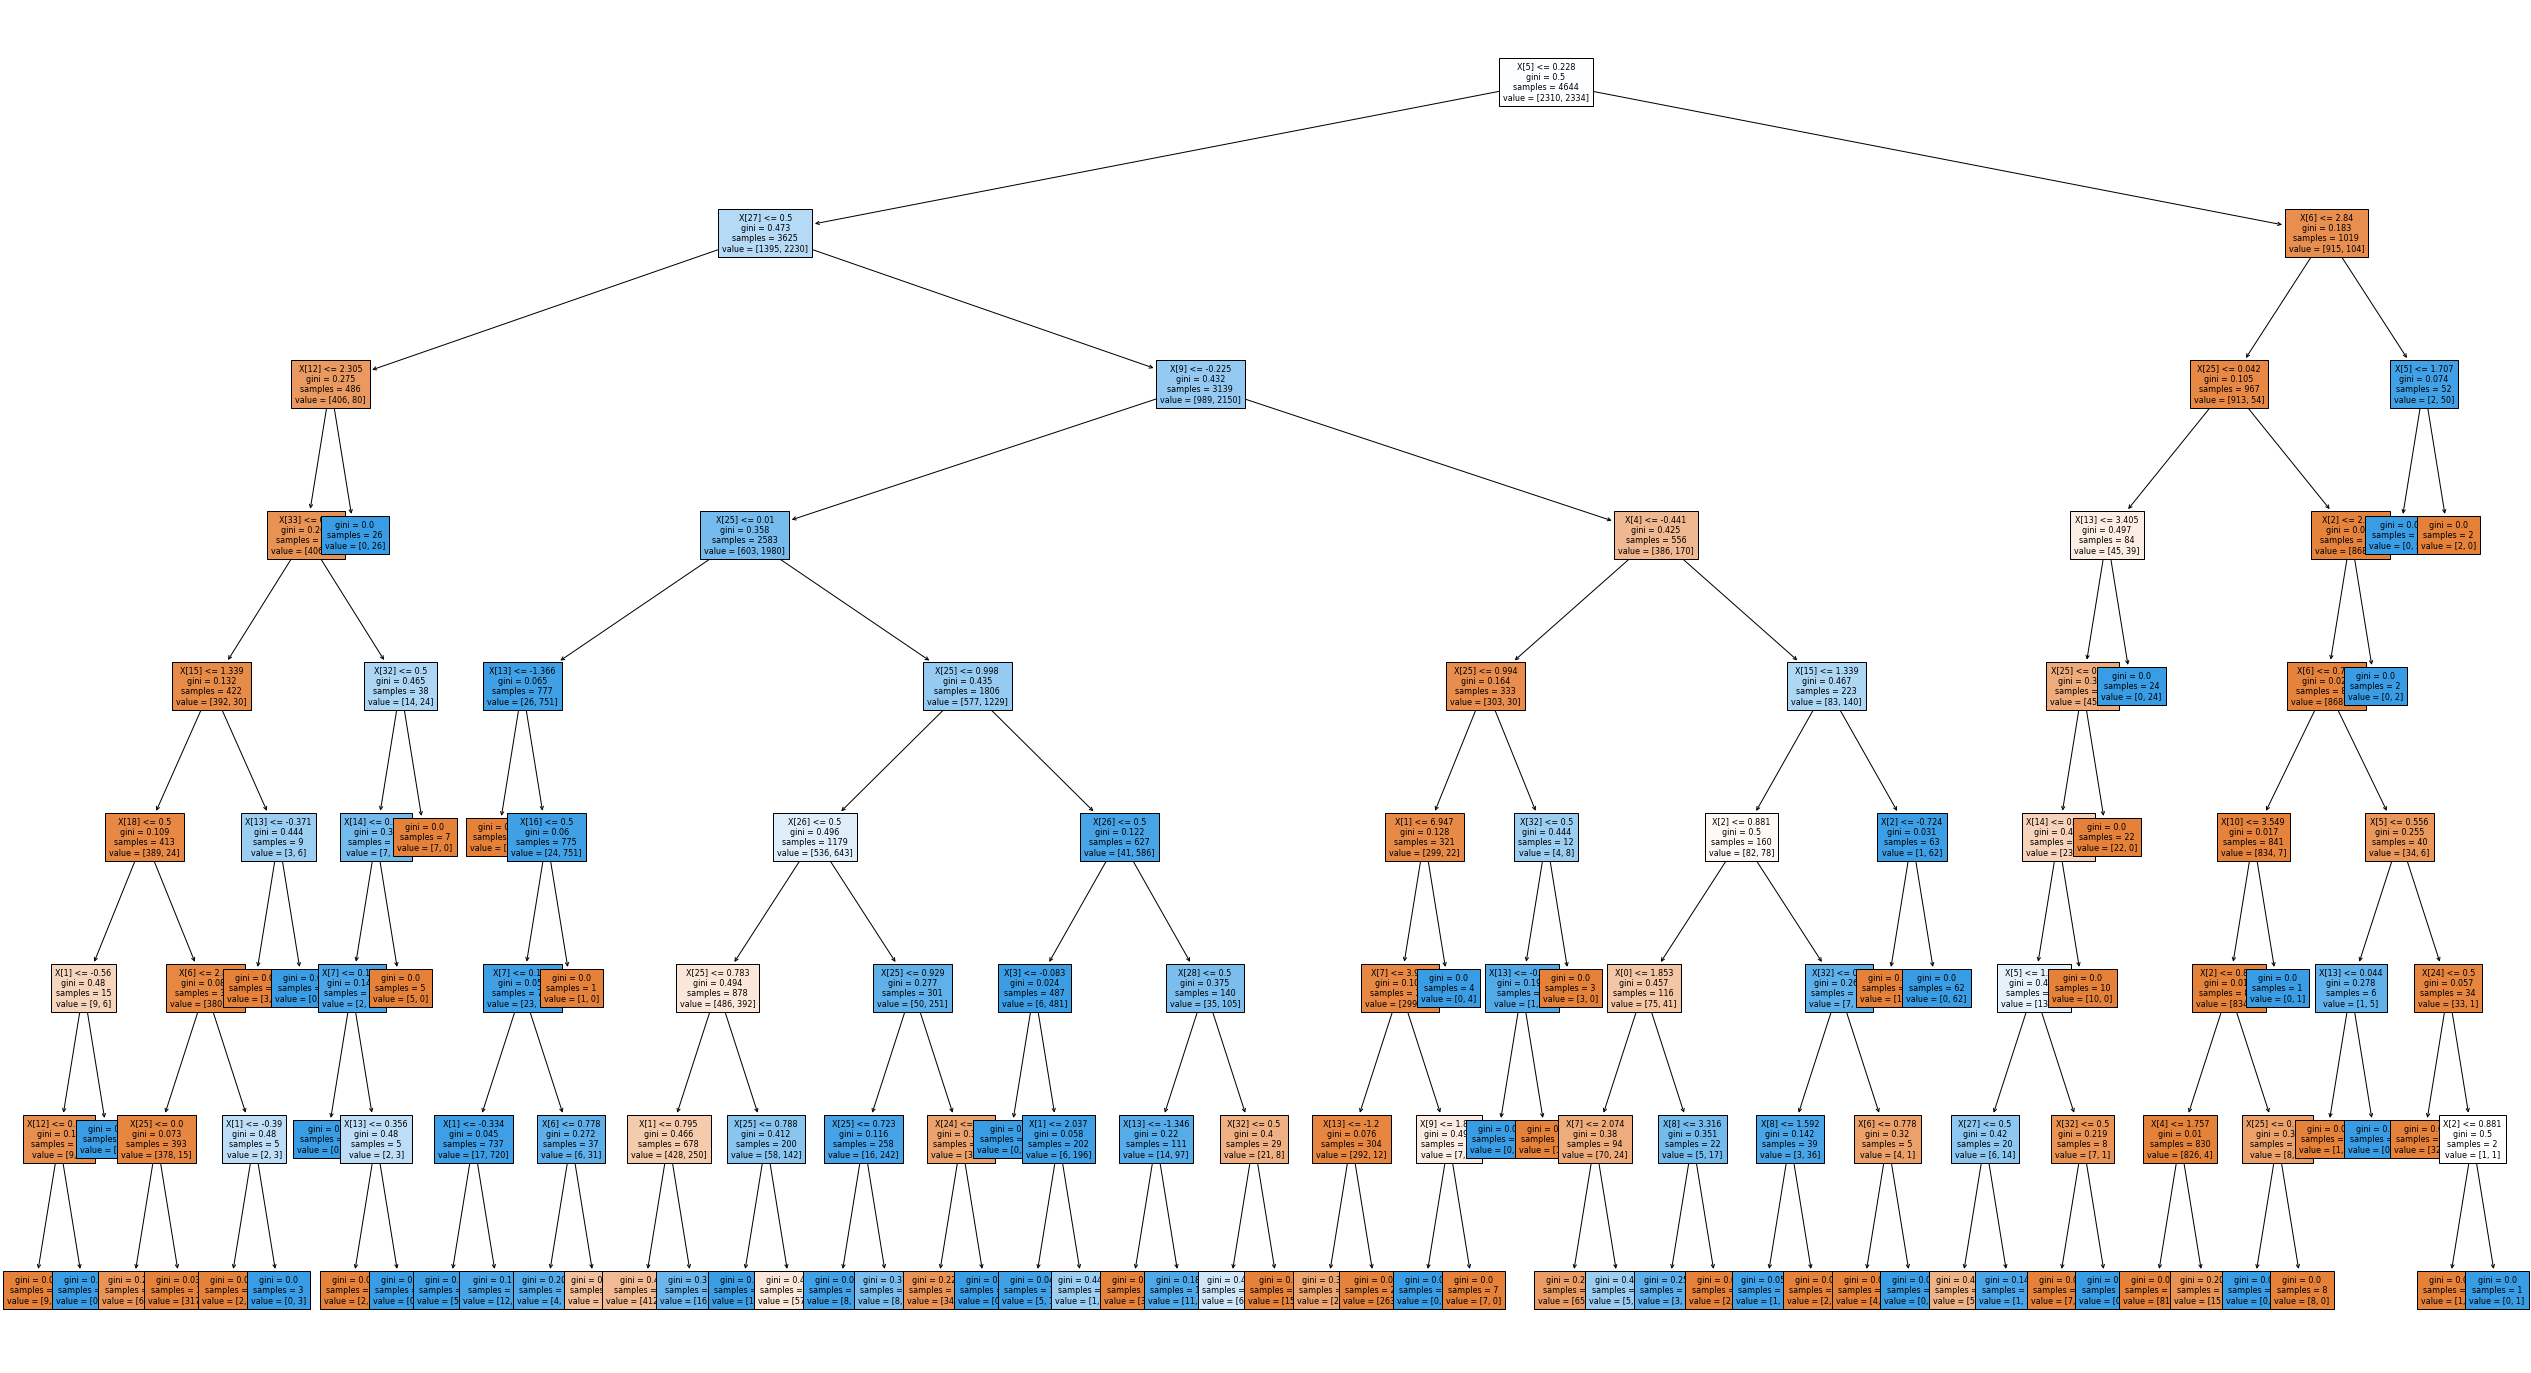

In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=(8))
#
Y=dfTrain3['CLASS_LABEL']
X=dfTrain3[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized','AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]

plt.figure(figsize=(45,25))
tree.plot_tree(clf.fit(X, Y),filled=True,fontsize=8)
plt.show()


# Part B

## Grid search

Grid search using K-fold cross validation.

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

Y=dfTrain3['CLASS_LABEL']
X=dfTrain3[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized','AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]

min_samples_splits = np.linspace(0.1,1.0,35, endpoint = True) 
print(min_samples_splits)

tuned_parameters = [{'min_samples_split':min_samples_splits}]

base_model = tree.DecisionTreeClassifier()

clf = GridSearchCV(estimator=base_model, param_grid=tuned_parameters, cv = 5, verbose = 3)
clf.fit(X,Y)
print(clf.cv_results_['mean_test_score'])
scores = ['precision','recall','f1']

clf = GridSearchCV(base_model, tuned_parameters,cv=5,scoring=scores, refit='f1', verbose=3)
clf.fit(X,Y) 

print(clf.cv_results_['mean_test_f1'])
print(clf.cv_results_['mean_test_recall'])
print(clf.cv_results_['mean_test_recall'])



[0.1        0.12647059 0.15294118 0.17941176 0.20588235 0.23235294
 0.25882353 0.28529412 0.31176471 0.33823529 0.36470588 0.39117647
 0.41764706 0.44411765 0.47058824 0.49705882 0.52352941 0.55
 0.57647059 0.60294118 0.62941176 0.65588235 0.68235294 0.70882353
 0.73529412 0.76176471 0.78823529 0.81470588 0.84117647 0.86764706
 0.89411765 0.92058824 0.94705882 0.97352941 1.        ]
Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END .............min_samples_split=0.1;, score=0.861 total time=   0.0s
[CV 2/5] END .............min_samples_split=0.1;, score=0.882 total time=   0.0s
[CV 3/5] END .............min_samples_split=0.1;, score=0.858 total time=   0.0s
[CV 4/5] END .............min_samples_split=0.1;, score=0.851 total time=   0.0s
[CV 5/5] END .............min_samples_split=0.1;, score=0.858 total time=   0.0s
[CV 1/5] END min_samples_split=0.1264705882352941;, score=0.856 total time=   0.0s
[CV 2/5] END min_samples_split=0.1264705882352941;, score=0.862 

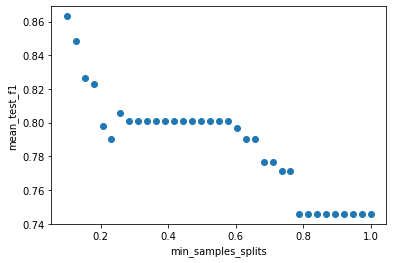

In [11]:
# Graphing the min_samples_splits and mean f1 scores
plt.figure()
plt.scatter(x=min_samples_splits, y = clf.cv_results_['mean_test_f1'])
plt.ylabel('mean_test_f1')
plt.xlabel('min_samples_splits')
plt.show()

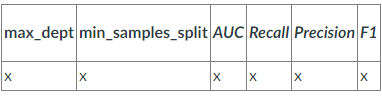

max_depth = 8

min_sample_split = 0.4

In [20]:
# AUC score
clf = tree.DecisionTreeClassifier(min_samples_split=0.4)
clf = clf.fit(X,Y)
Y_predicted = clf.predict(X)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

auc = roc_auc_score(Y,Y_predicted)
print(auc)

0.7936450439021133


Fitting 4 folds for each of 35 candidates, totalling 140 fits
[CV 1/4] END min_samples_split=0.1; f1: (test=0.865) precision: (test=0.855) recall: (test=0.877) total time=   0.0s
[CV 2/4] END min_samples_split=0.1; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1; f1: (test=0.851) precision: (test=0.855) recall: (test=0.848) total time=   0.0s
[CV 4/4] END min_samples_split=0.1; f1: (test=0.852) precision: (test=0.891) recall: (test=0.815) total time=   0.0s
[CV 1/4] END min_samples_split=0.1264705882352941; f1: (test=0.838) precision: (test=0.869) recall: (test=0.810) total time=   0.0s
[CV 2/4] END min_samples_split=0.1264705882352941; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1264705882352941; f1: (test=0.829) precision: (test=0.885) recall: (test=0.779) total time=   0.0s
[CV 4/4] END min_samples_split=0.1264705882352941; f1: (test=0.793) precis

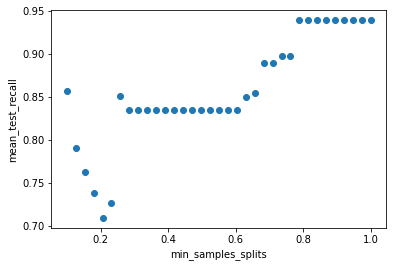

[0.85649114 0.79096592 0.76310754 0.738665   0.70954366 0.72714349
 0.85133653 0.83461268 0.83461268 0.83461268 0.83461268 0.83461268
 0.83461268 0.83461268 0.83461268 0.83461268 0.83461268 0.83461268
 0.83461268 0.83461268 0.85005008 0.85519588 0.88987053 0.88987053
 0.89801805 0.89801805 0.93914918 0.93914918 0.93914918 0.93914918
 0.93914918 0.93914918 0.93914918 0.93914918 0.93914918]


In [14]:
# Recall 
clf = GridSearchCV(base_model, tuned_parameters,cv=4,scoring=scores, refit='recall', verbose=3)
clf.fit(X,Y)
plt.figure()
plt.scatter(x=min_samples_splits, y = clf.cv_results_['mean_test_recall'])
plt.ylabel('mean_test_recall')
plt.xlabel('min_samples_splits')
plt.show()
print(clf.cv_results_['mean_test_recall'])

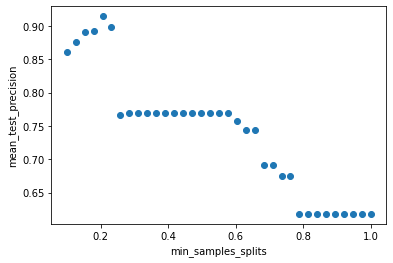

[0.86058729 0.87637647 0.89028016 0.89254881 0.91417126 0.89864043
 0.76708251 0.7694361  0.7694361  0.7694361  0.7694361  0.7694361
 0.7694361  0.7694361  0.7694361  0.7694361  0.7694361  0.7694361
 0.7694361  0.75774779 0.74405591 0.74405591 0.69212192 0.69212192
 0.67472939 0.67472939 0.61800223 0.61800223 0.61800223 0.61800223
 0.61800223 0.61800223 0.61800223 0.61800223 0.61800223]


In [13]:
# Precision

clf = GridSearchCV(base_model, tuned_parameters,cv=4,scoring=scores, refit='precision', verbose=3)
clf.fit(X,Y)
plt.figure()
plt.scatter(x=min_samples_splits, y = clf.cv_results_['mean_test_precision'])
plt.ylabel('mean_test_precision')
plt.xlabel('min_samples_splits')
plt.show()
print(clf.cv_results_['mean_test_precision'])

Fitting 4 folds for each of 35 candidates, totalling 140 fits
[CV 1/4] END min_samples_split=0.1; f1: (test=0.865) precision: (test=0.855) recall: (test=0.877) total time=   0.0s
[CV 2/4] END min_samples_split=0.1; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1; f1: (test=0.851) precision: (test=0.855) recall: (test=0.848) total time=   0.0s
[CV 4/4] END min_samples_split=0.1; f1: (test=0.852) precision: (test=0.891) recall: (test=0.815) total time=   0.0s
[CV 1/4] END min_samples_split=0.1264705882352941; f1: (test=0.838) precision: (test=0.869) recall: (test=0.810) total time=   0.0s
[CV 2/4] END min_samples_split=0.1264705882352941; f1: (test=0.874) precision: (test=0.862) recall: (test=0.887) total time=   0.0s
[CV 3/4] END min_samples_split=0.1264705882352941; f1: (test=0.829) precision: (test=0.885) recall: (test=0.779) total time=   0.0s
[CV 4/4] END min_samples_split=0.1264705882352941; f1: (test=0.793) precis

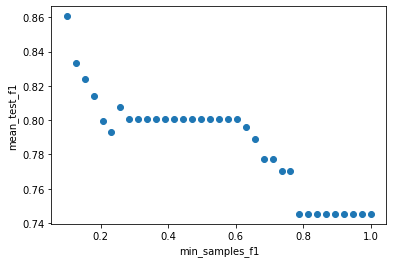

[0.86054618 0.83352348 0.82424398 0.8139156  0.79928448 0.79286761
 0.80739774 0.80085307 0.80085307 0.80085307 0.80085307 0.80085307
 0.80085307 0.80085307 0.80085307 0.80085307 0.80085307 0.80085307
 0.80085307 0.80085307 0.79617941 0.7888703  0.7775988  0.7775988
 0.77021561 0.77021561 0.74528039 0.74528039 0.74528039 0.74528039
 0.74528039 0.74528039 0.74528039 0.74528039 0.74528039]


In [19]:
# F1 score
clf = GridSearchCV(base_model, tuned_parameters,cv=4,scoring=scores, refit='f1', verbose=3)
clf.fit(X,Y) 
plt.figure()
plt.scatter(x=min_samples_splits, y = clf.cv_results_['mean_test_f1'])
plt.ylabel('mean_test_f1')
plt.xlabel('min_samples_f1')
plt.show()
print(clf.cv_results_['mean_test_f1'])

### plot ROC curve

C:\Users\jlusk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


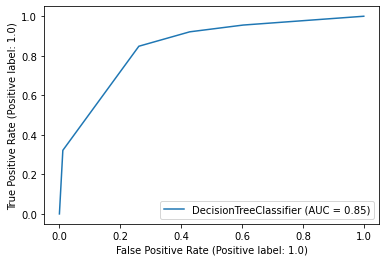

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
Y=dfTrain3['CLASS_LABEL']
X=dfTrain3[['UrlLength_Standardized','NumNumericChars_Standardized','NumDots_Standardized','SubdomainLevel_Standardized','PathLevel_Standardized','NumDash_Standardized','NumDashInHostname_Standardized','NumUnderscore_Standardized','NumPercent_Standardized','NumQueryComponents_Standardized','NumAmpersand_Standardized','NumHash_Standardized','HostnameLength_Standardized','PathLength_Standardized','QueryLength_Standardized','NumSensitiveWords_Standardized','AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths','DoubleSlashInPath','EmbeddedBrandName','PctExtResourceUrls','ExtFavicon','InsecureForms','RelativeFormAction','ExtFormAction','RightClickDisabled','PopUpWindow','IframeOrFrame','MissingTitle','ImagesOnlyInForm']]
clf=tree.DecisionTreeClassifier(min_samples_split=0.4,max_depth=8)
clf=clf.fit(X,Y)
Y_predicted = clf.predict(X)
auc = roc_auc_score(Y,Y_predicted)
plot_roc_curve(clf,X,Y)

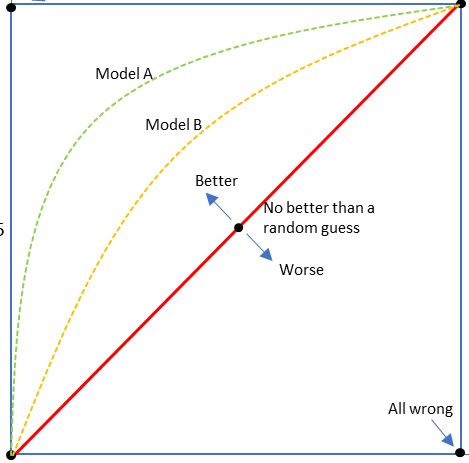